,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
open,126.0,6.723017e-16,1.003992,-2.035847,-0.752858,0.265054,0.779048,1.791820,-0.383296,-0.997185
high,126.0,-3.498084e-16,1.003992,-2.135224,-0.793989,0.188744,0.805572,1.709927,-0.396757,-0.961426
low,126.0,4.202987e-16,1.003992,-2.047918,-0.812043,0.273712,0.794158,1.715058,-0.402714,-1.034728
close,126.0,6.185528e-16,1.003992,-2.132115,-0.738929,0.258801,0.818582,1.753021,-0.442794,-0.903762
volume,126.0,9.604310e-17,1.003992,-1.531243,-0.724632,-0.279852,0.521632,4.689911,1.383099,3.067088
sma_10,117.0,-9.109522e-16,1.004301,-1.802942,-1.064389,0.460586,0.781829,1.471531,-0.370306,-1.380508
weekly_return,121.0,1.491002e-17,1.004158,-2.426489,-0.602613,-0.150235,0.560072,2.881762,0.519119,0.514978


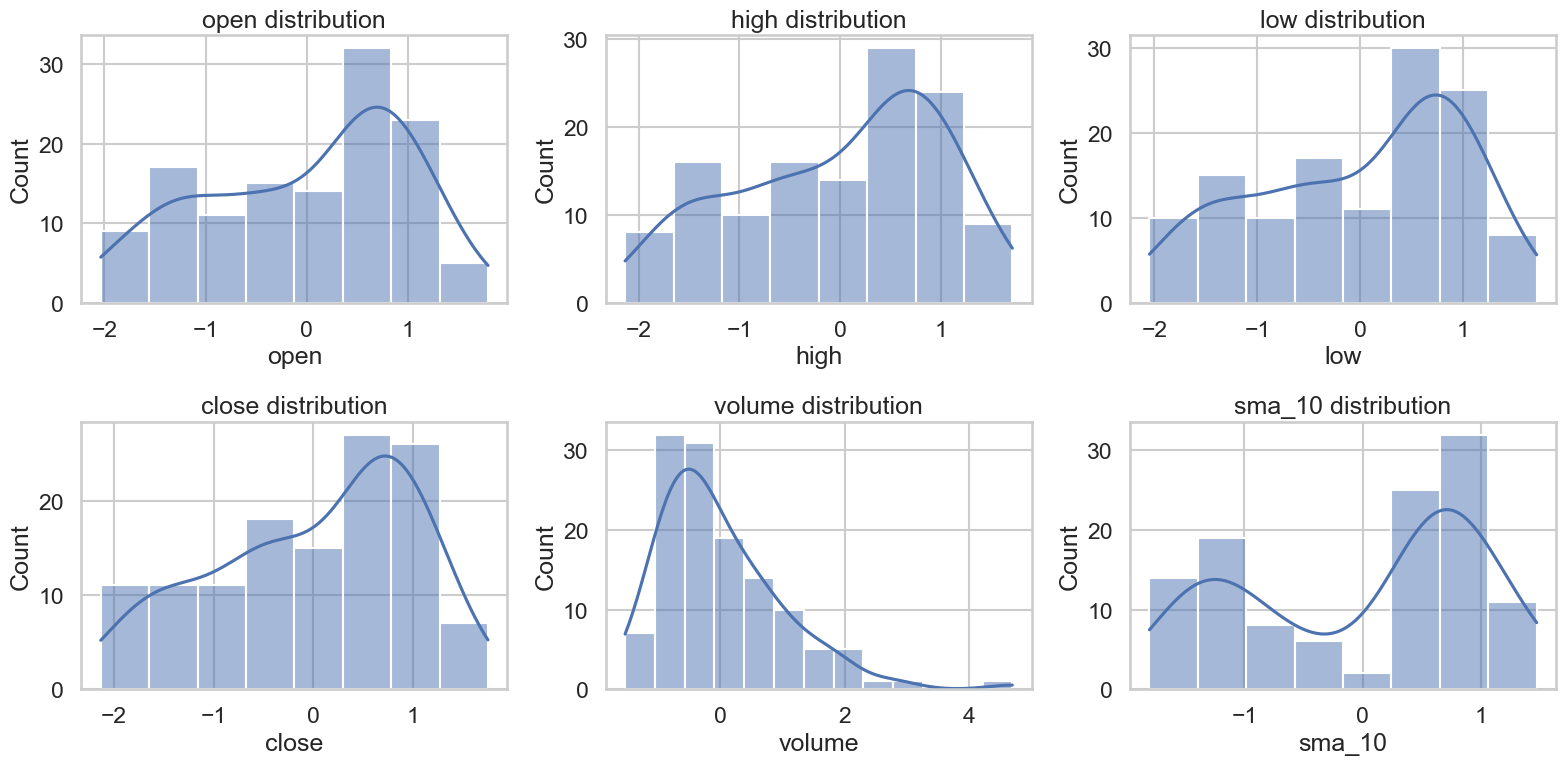

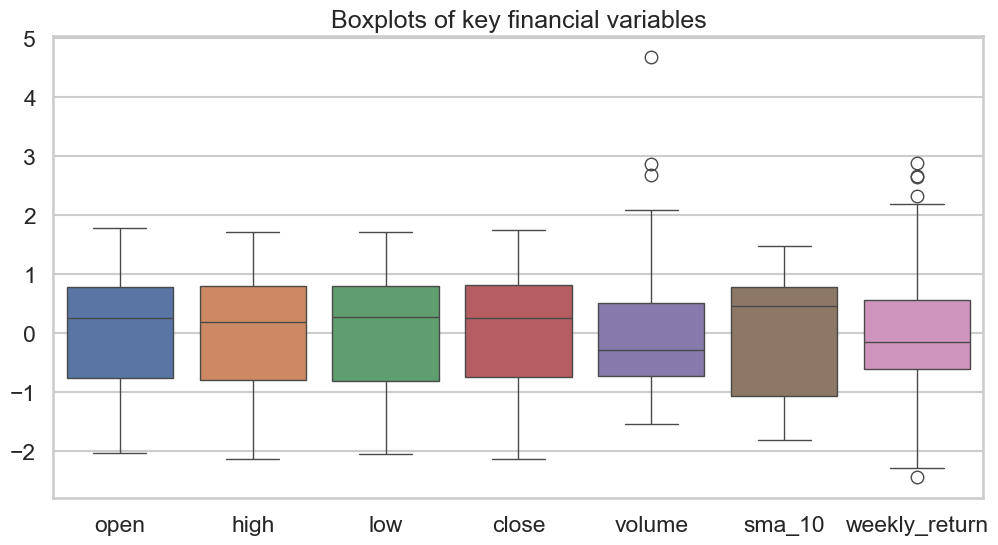

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

df = pd.read_csv('C:/Users/박서아/bootcamp_andrew_song/project/data/processed/tsla_processed.csv', parse_dates=['date'])
df = df.sort_values("date")

numeric_cols = ["open", "high", "low", "close", "volume", "sma_10", "weekly_return"]
desc = df[numeric_cols].describe().T
desc["skew"] = [skew(df[c].dropna()) for c in desc.index]
desc["kurtosis"] = [kurtosis(df[c].dropna()) for c in desc.index]
display(desc)

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"{col} distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of key financial variables")
plt.show()

TIME SERIES ANALYSIS


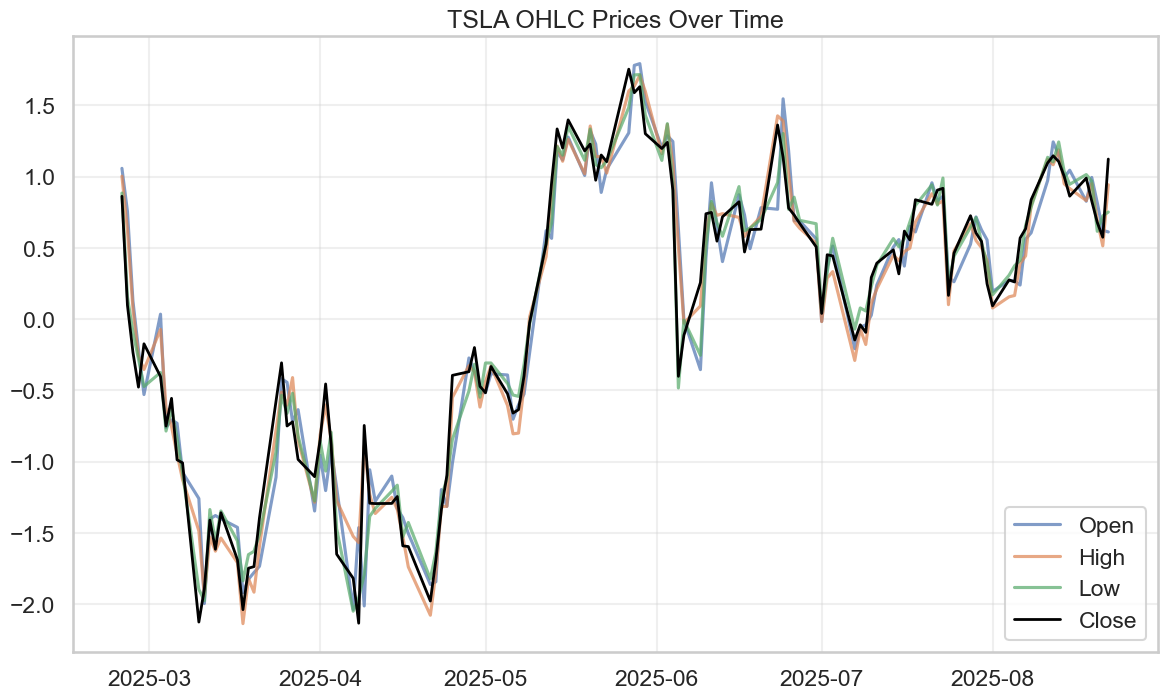

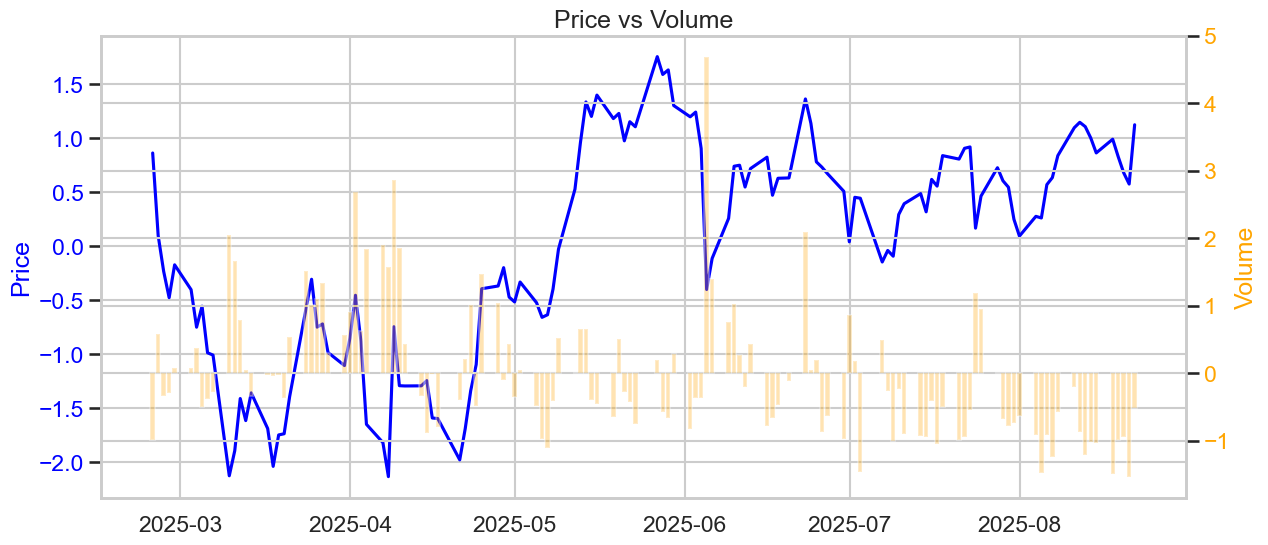

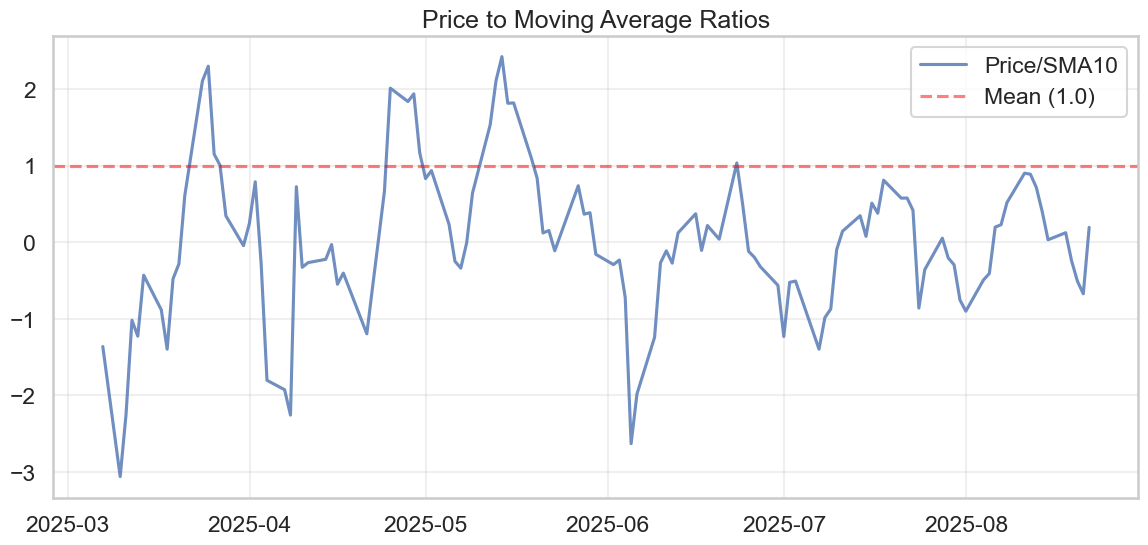

In [23]:

print("TIME SERIES ANALYSIS")
# OLHC 
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['open'], label='Open', alpha=0.7)
plt.plot(df['date'], df['high'], label='High', alpha=0.7)
plt.plot(df['date'], df['low'], label='Low', alpha=0.7)
plt.plot(df['date'], df['close'], label='Close', linewidth=2, color='black')
plt.title('TSLA OHLC Prices Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

#Price vs Volume
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(df['date'], df['close'], color='blue', label='Close Price')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(df['date'], df['volume'], alpha=0.3, color='orange', label='Volume')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.title('Price vs Volume')

#Price vs SMA_10
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['price_sma_10_ratio'], label='Price/SMA10', alpha=0.8)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Mean (1.0)')
plt.title('Price to Moving Average Ratios')
plt.legend()
plt.grid(True, alpha=0.3)

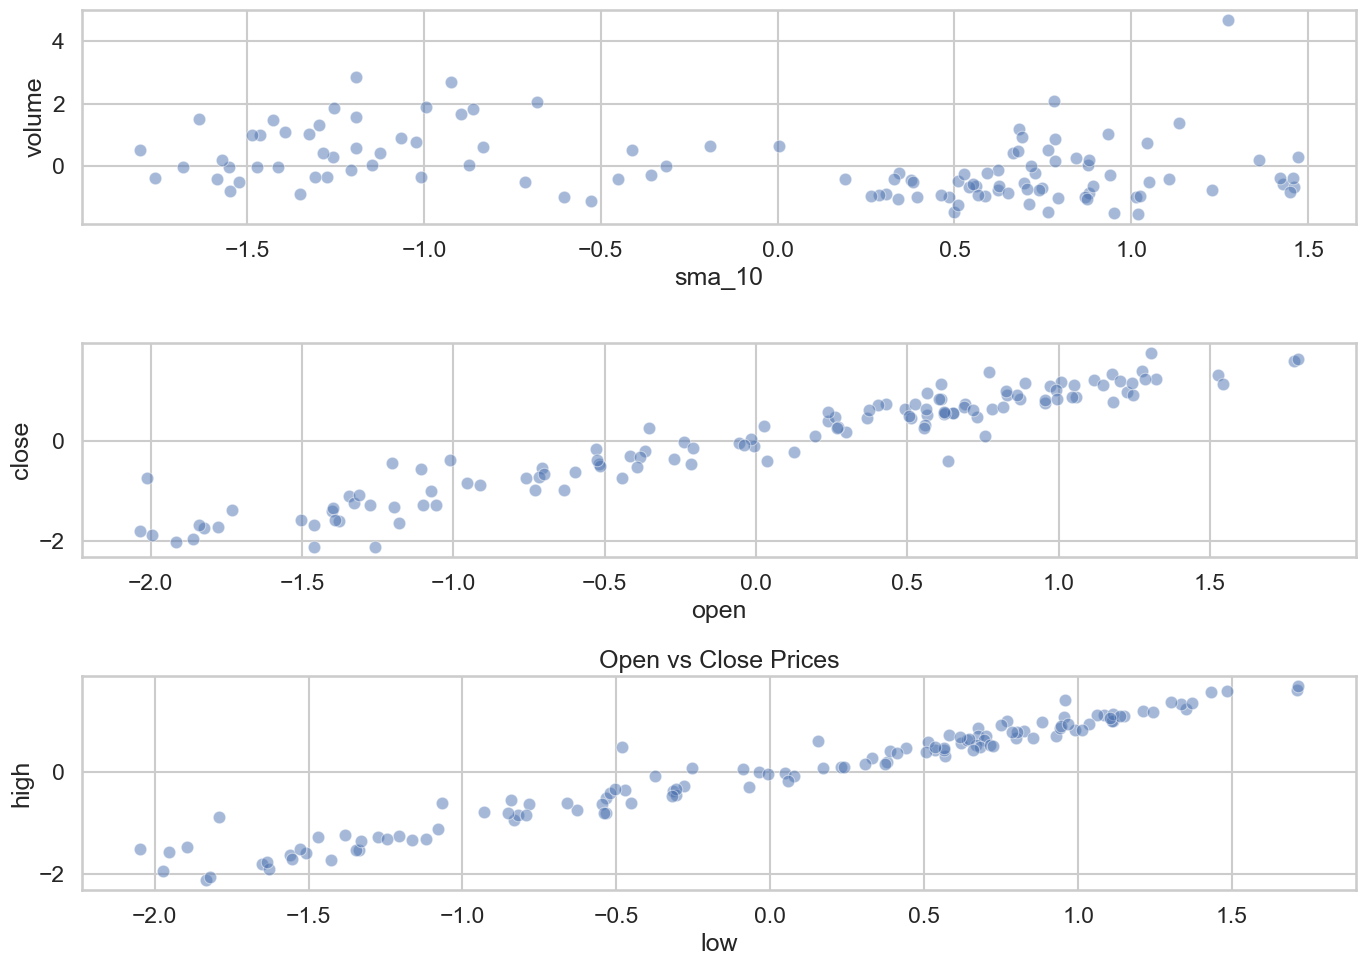

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# high vs low
sns.scatterplot(data=df, x="low", y="high", alpha=0.5, ax=axes[2])
plt.title("Low vs High Prices")

# sma_10 vs volume
sns.scatterplot(data=df, x="sma_10", y="volume", alpha=0.5, ax=axes[0])
plt.title("Adj Close vs Volume")

# open vs close
sns.scatterplot(data=df, x="open", y="close", alpha=0.5, ax=axes[1])
plt.title("Open vs Close Prices")

plt.tight_layout()
plt.show()

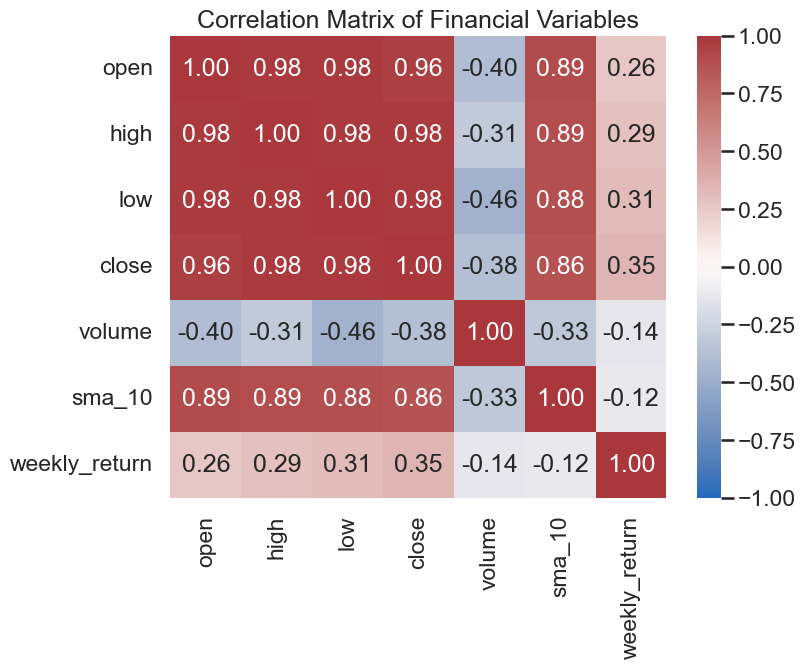

In [20]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Financial Variables")
plt.show()

In [32]:
def eda_summary(df: pd.DataFrame, numeric_cols=None):
    """Return a dict with quick profiling stats and basic missingness.
    """
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = {}
    out['shape'] = df.shape
    out['dtypes'] = df.dtypes.to_dict()
    out['missing'] = df.isna().sum().to_dict()
    profile = df[numeric_cols].describe().T
    profile['skew'] = [skew(df[c].dropna()) for c in profile.index]
    profile['kurtosis'] = [kurtosis(df[c].dropna()) for c in profile.index]
    out['numeric_profile'] = profile
    return out

summary = eda_summary(df)
summary['shape'], list(summary['dtypes'].items())[:3]

((126, 19),
 [('date', dtype('O')),
  ('open', dtype('float64')),
  ('high', dtype('float64'))])